## The OLG model
This file constructs graphs describing the steady state of the OLG model, as well as several comparative statics. 

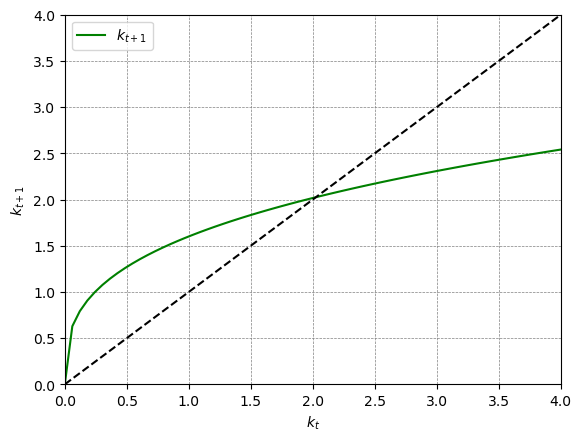

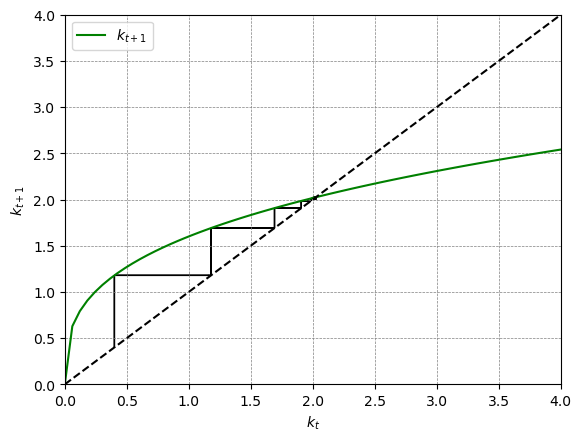

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize


## Parameters
α = 1/3
σ = 1.0001
δ = 0.1
β = 0.96
n = 0.02
A = 5

## Production function
def f(k,α):
    out = A*k**α
    return out
    
kmax = 6
knum = 100

## Steady state
k_olg = (A*β/(1+β) * (1-α)/(1+n) )**(1/(1-α))
r_olg = α*A*k_olg**(α-1)
w_olg = (1-α)*A*k_olg**(α)

c0 = 1/(1+β) * w_olg
c1 = (1+r_olg)*β/(1+β) * w_olg

ca = c0 + c1/(1+n)
cb = A*k_olg**α-n*k_olg

## Standard graph of the OLG economy
kvec = np.linspace(0,kmax,knum)
plt.plot(kvec,β/(1+β) * (1-α)/(1+n)*f(kvec,α), label= r'$k_{t+1}$', color = 'green')
plt.plot(kvec,kvec, color = 'black', linestyle = 'dashed')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.xlabel(r'$k_t$')
plt.ylabel(r'$k_{t+1}$')
plt.ylim(0,4)
plt.xlim(0,4)
plt.legend()
plt.savefig('olg_diag.pdf')
plt.show()

## Transition
k0 = 0.4
for i in range(10):
    k1 = β/(1+β) * (1-α)/(1+n)*f(k0,α)
    plt.arrow(k0, k0, 0,(k1-k0), width = 0.0002, length_includes_head=True,
          head_width=0.002, head_length=0.02)
    plt.arrow(k0, k1, (k1-k0),0, width = 0.0002, length_includes_head=True,
          head_width=0.002, head_length=0.02)
    k0 = k1

## Dynamics of the OLG econmy
kvec = np.linspace(0,kmax,knum)
plt.plot(kvec,β/(1+β) * (1-α)/(1+n)*f(kvec,α), label= r'$k_{t+1}$', color = 'green')
plt.plot(kvec,kvec, color = 'black', linestyle = 'dashed')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.xlabel(r'$k_t$')
plt.ylabel(r'$k_{t+1}$')
plt.ylim(0,4)
plt.xlim(0,4)
plt.legend()
plt.savefig('olg_dynamic.pdf')
plt.show()



2.0250726245700457


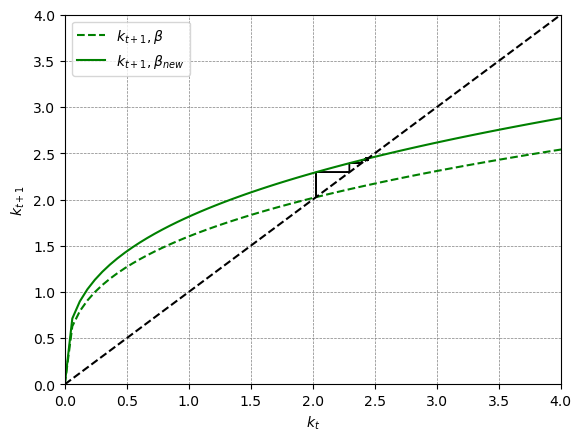

In [45]:
## Higher patience
## Steady state
βnew = β*1.3

kvec = np.linspace(0,kmax,knum)
plt.plot(kvec,β/(1+β) * (1-α)/(1+n)*f(kvec,α), label= r'$k_{t+1}, \beta$', color = 'green', linestyle = 'dashed')

## Transition
k0 = k_olg
print(k0)
for i in range(10):
    k1 = βnew/(1+βnew) * (1-α)/(1+n)*f(k0,α)
    plt.arrow(k0, k0, 0,(k1-k0), width = 0.0002, length_includes_head=True,
          head_width=0.002, head_length=0.02)
    plt.arrow(k0, k1, (k1-k0),0, width = 0.0002, length_includes_head=True,
          head_width=0.002, head_length=0.02)
    k0 = k1
    
plt.plot(kvec,βnew/(1+βnew) * (1-α)/(1+n)*f(kvec,α), label= r'$k_{t+1}, \beta_{new}$', color = 'green')
plt.plot(kvec,kvec, color = 'black', linestyle = 'dashed')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.xlabel(r'$k_t$')
plt.ylabel(r'$k_{t+1}$')
plt.ylim(0,4)
plt.xlim(0,4)
plt.legend()
plt.savefig('olg_newbeta.pdf')
plt.show()


2.0250726245700457


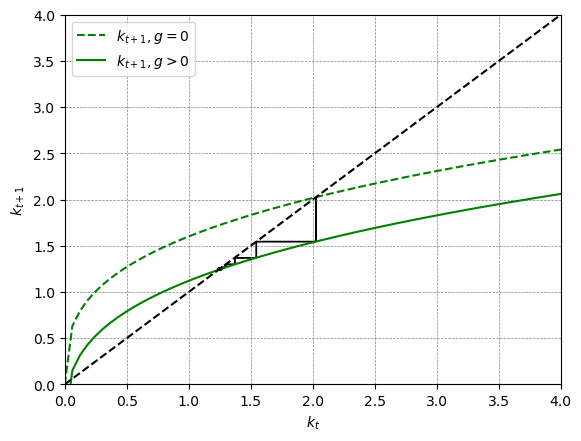

In [18]:
## Government spending
g = 1
## Steady state
kvec = np.linspace(0,kmax,knum)
plt.plot(kvec,β/(1+β) * 1/(1+n)*((1-α)*f(kvec,α)), label= r'$k_{t+1}, g=0 $', color = 'green', linestyle = 'dashed')

## Transition
k0 = k_olg
print(k0)
for i in range(10):
    k1 = β/(1+β) * 1/(1+n)*((1-α)*f(k0,α)-g)
    plt.arrow(k0, k0, 0,(k1-k0), width = 0.0002, length_includes_head=True,
          head_width=0.002, head_length=0.02)
    plt.arrow(k0, k1, (k1-k0),0, width = 0.0002, length_includes_head=True,
          head_width=0.002, head_length=0.02)
    k0 = k1
    
plt.plot(kvec,β/(1+β) * 1/(1+n)*((1-α)*f(kvec,α)-g), label= r'$k_{t+1}, g>0$', color = 'green')
plt.plot(kvec,kvec, color = 'black', linestyle = 'dashed')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.xlabel(r'$k_t$')
plt.ylabel(r'$k_{t+1}$')
plt.ylim(0,4)
plt.xlim(0,4)
plt.legend()
plt.savefig('olg_gov.pdf')
plt.show()

0.09447236180904528
1.7458897600245493
1.7458897600245493


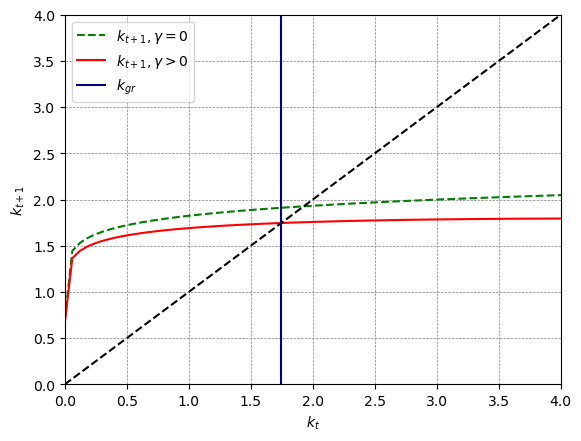

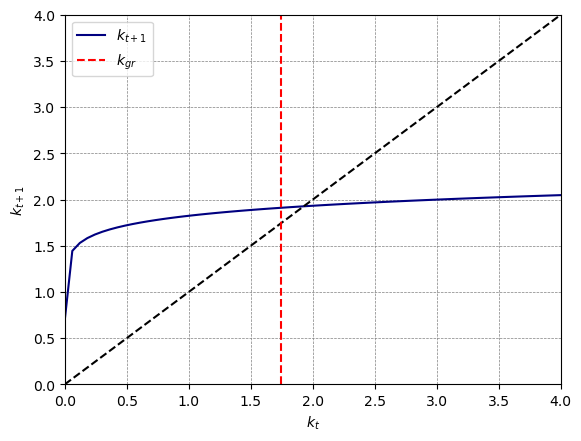

In [7]:
## Steady government debt
## Steady state

α = 1/12
β = 0.99
n = 0.25

γ_1 = 0.225
γ = (n*(1-α)*β)/(α*(1+β)*(1+n))-1
print(γ)
kvec = np.linspace(0.00001,kmax,knum)

## Competitive, tax free equilibrium
plt.plot(kvec,β/(1+β) * (1-α)/(1+n)* f(kvec,α), label= r'$k_{t+1}, γ= 0$', color = 'green', linestyle = 'dashed')

## Tax equilibrium with government debt
frac = β/(1+β) * 1/(1+n)
w =  (1-α) *f(kvec,α)
r =      α*A*kvec**(α-1)
ktax =  frac/ ( 1 + 1/(1+β)*γ) *(w - (1+r)*γ*kvec )

## Optimal level of capital: n
k_gr =  (n/(A*α))**(1/(α-1))
k_test = (A* β *((1-α)-γ*α)/((1+γ)*(1+β)*(1+n)-β*γ*n) )**(1/(1-α))
print(k_gr)
print(k_test) ## make sure the level is right

plt.plot(kvec,ktax, label= r'$k_{t+1}, γ>0$', color = 'red')
plt.plot(kvec,kvec, color = 'black', linestyle = 'dashed')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.axvline(k_gr, color = 'navy', label = r'$k_{gr}$')
plt.xlabel(r'$k_t$')
plt.ylabel(r'$k_{t+1}$')
plt.ylim(0,4)
plt.xlim(0,4)
plt.legend()
plt.savefig('olg_govdebt.pdf')
plt.show()

plt.plot(kvec,β/(1+β) * (1-α)/(1+n)* f(kvec,α), label= r'$k_{t+1}$', color = 'navy')
plt.plot(kvec,kvec, color = 'black', linestyle = 'dashed')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.axvline(k_gr, color = 'red', label = r'$k_{gr}$', linestyle = 'dashed')
plt.xlabel(r'$k_t$')
plt.ylabel(r'$k_{t+1}$')
plt.ylim(0,4)
plt.xlim(0,4)
plt.legend()
plt.savefig('olg_firstshow.pdf')
plt.show()

0.09447236180904528


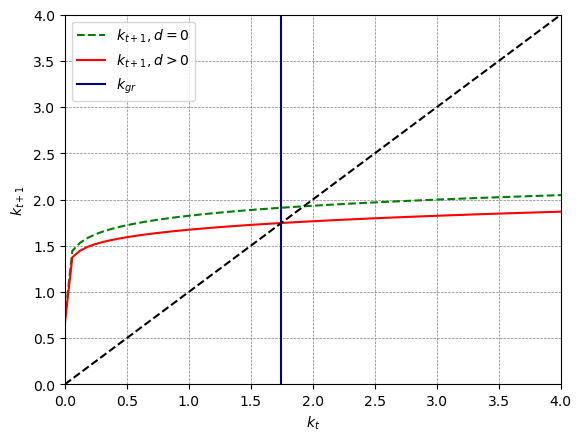

In [20]:
## PAYG social security
## Steady state

α = 1/12
β = 0.99
n = 0.25

γ_1 = 0.225
γ = (n*(1-α)*β)/(α*(1+β)*(1+n))-1
print(γ)
kvec = np.linspace(0.00001,kmax,knum)

## Competitive, tax free equilibrium
plt.plot(kvec,β/(1+β) * (1-α)/(1+n)* f(kvec,α), label= r'$k_{t+1}, d= 0$', color = 'green', linestyle = 'dashed')

k_gr =  (n/(A*α))**(1/(α-1))
def find_d(d, k_gr):
    frac = β/(1+β) * 1/(1+n)
    w =  (1-α) *f(k_gr,α)
    r =      α*A*k_gr**(α-1)
    kd =  frac *(w - d) - (1+n)/(1+r) * d
    return (kd - k_gr)**2
dguess = 0.12
dopt = optimize.minimize_scalar(find_d, dguess, bounds=(0 , 10), args=(k_gr)) 

## Tax equilibrium with government debt
frac = β/(1+β) * 1/(1+n)
w =  (1-α) *f(kvec,α)
r =      α*A*kvec**(α-1)
d = dopt.x
kd =  frac *(w - d) - (1+n)/(1+r) * d

plt.plot(kvec,kd, label= r'$k_{t+1}, d>0$', color = 'red')
plt.plot(kvec,kvec, color = 'black', linestyle = 'dashed')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.axvline(k_gr, color = 'navy', label = r'$k_{gr}$')
plt.xlabel(r'$k_t$')
plt.ylabel(r'$k_{t+1}$')
plt.ylim(0,4)
plt.xlim(0,4)
plt.legend()
plt.savefig('olg_payg.pdf')
plt.show()

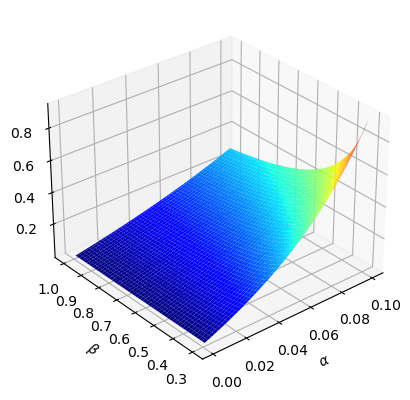

In [21]:
## Decentralized equilibrium vs golden rule
a_vec = np.linspace(0.001,.1,100)
b_vec = np.linspace(0.3,1,100)
from matplotlib import cm # for colormaps

def gr_func(a,b):
    #frac = a/((1-a)*A)*(1+b)/b
    #wedge =  frac / (1-frac)
    wedge = a*(1+b)/((1-a)*b-a*(1+b))
       
    return wedge

a_mesh,b_mesh = np.meshgrid(a_vec,b_vec,indexing='ij')

grmesh = gr_func(a_mesh, b_mesh)


fig = plt.figure() # create the figure
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d type axis 
ax.plot_surface(a_mesh,b_mesh,grmesh,cmap=cm.jet); # create surface plot in the axis
ax.view_init(30, 230)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\beta$')
plt.savefig('alphabeta.pdf')
plt.show()

Capital in the competitive equilibrium is: 1.9265739752652282
Capital in the golden rule economy is: 1.7458897600245493


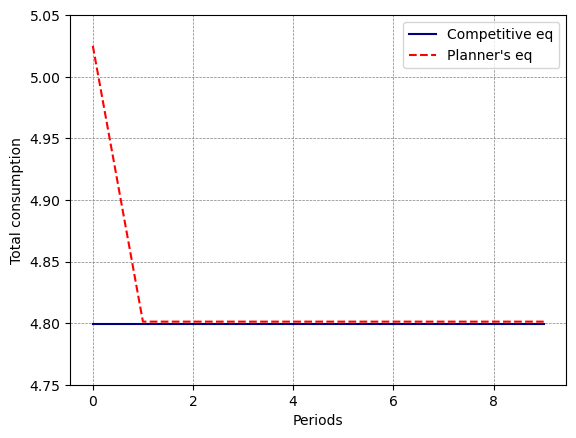

In [2]:
## Planner intervention

α = 1/12
β = 0.99
n = 0.25
A =5
k_comp = ( β/(1+β) * A*(1-α)/(1+n) ) ** (1/(1-α))
print("Capital in the competitive equilibrium is:", k_comp)
kvec = np.ones(10)* k_comp ## Stay in competitive steady state
cvec = f(kvec,α) - n* kvec

# αk^(α-1) = n .. (n/α)**(1/(α-1))
k_gr =  (n/(A*α))**(1/(α-1))
print("Capital in the golden rule economy is:", k_gr)
kvec_gr =  np.ones(10)* k_gr
cvec_gr = f(kvec_gr,α) - n * kvec_gr
# c =  k +f(k)- (1+n)k1 
cvec_gr[0] = k_comp +f(k_comp,α)- (1+n)*k_gr

plt.plot(cvec, color = 'navy', label = 'Competitive eq')
plt.plot(cvec_gr, color = 'red', linestyle = 'dashed', label = "Planner's eq")
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylim(4.75,5.05)
plt.legend()
plt.xlabel('Periods')
plt.ylabel('Total consumption')
plt.savefig('plannerpath.pdf')
